Importações:


In [1]:
from Modelos import *
from Preprocessamento import *
from segmentandoDatasets import *

2024-11-26 17:28:18.362695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 17:28:18.376690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 17:28:18.380922: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 17:28:18.391456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 17:28:19.311748: W tensorflow/compiler/tf2

Segmentando a Base e preprocessando

In [2]:
segmentacao_Kyoto()

treino, _ = preprocessamento_dataframe(caminho_csv='CSV/Kyoto/Kyoto_Segmentado_Treino.csv', autoencoder=True)
validacao, _ = preprocessamento_dataframe(caminho_csv='CSV/Kyoto/Kyoto_Segmentado_Validacao.csv', autoencoder=True)
teste, _ = preprocessamento_dataframe(caminho_csv='CSV/Kyoto/Kyoto_Segmentado_Teste.csv', autoencoder=True, data_algumentantation=False)

            caminho_imagem
0      Kyoto/031100004.png
1      Kyoto/031200000.png
2      Kyoto/031200002.png
3      Kyoto/031300001.png
4      Kyoto/031300002.png
..                     ...
57  Kyoto/oct20-400003.png
58  Kyoto/oct20-400004.png
59    Kyoto/oct2000002.png
60    Kyoto/oct2000003.png
61    Kyoto/oct2000004.png

[62 rows x 1 columns]
Found 32 validated image filenames.
Imagens totais: 32
Found 10 validated image filenames.
Imagens totais: 10
Found 20 validated image filenames.
Imagens totais: 20


Criando um modelo

In [3]:
Modelo = Gerador(input_shape=(64, 64, 3))
Modelo.setNome('Modelo_Kyoto-2')
modelo = Modelo.construir_modelo(salvar=True)
modelo.summary()

I0000 00:00:1732652900.957660  186853 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732652900.992484  186853 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732652900.992636  186853 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732652900.993772  186853 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_12>
<KerasTensor shape=(None, 8, 8, 16), dtype=float32, sparse=False, name=keras_tensor_13>
<KerasTensor shape=(None, 8, 8, 16), dtype=float32, sparse=False, name=keras_tensor_14>
<KerasTensor shape=(None, 16, 16, 16), dtype=float32, sparse=False, name=keras_tensor_15>
<KerasTensor shape=(None, 16, 16, 16), dtype=float32, sparse=False, name=keras_tensor_16>
<KerasTensor shape=(None, 32, 32, 16), dtype=float32, sparse=False, name=keras_tensor_17>
<KerasTensor shape=(None, 32, 32, 16), dtype=float32, sparse=False, name=keras_tensor_18>
<KerasTensor shape=(None, 64, 64, 16), dtype=float32, sparse=False, name=keras_tensor_19>
<KerasTensor shape=(None, 64, 64, 32), dtype=float32, sparse=False, name=keras_tensor_20>
<KerasTensor shape=(None, 64, 64, 32), dtype=float32, sparse=False, name=keras_tensor_21>
<KerasTensor shape=(None, 64, 64, 3), dtype=float32, sparse=False, name=keras_tensor_22>


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 1411)           │     1,465,683 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     1,467,603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,933,286 (11.19 MB)

 Trainable params: 2,933,286 (11.19 MB)

 Non-trainable params: 0 (0.00 B)

Treinando um modelo

Treinando o modelo:  Modelo_Kyoto-2
Epoch 1/200


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732652905.678666  186922 service.cc:146] XLA service 0x712bd0015c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732652905.678686  186922 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-11-26 17:28:25.749152: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-26 17:28:26.095122: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - loss: 0.0722

I0000 00:00:1732652910.774564  186922 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from -inf to 0.11191, saving model to Pesos/Pesos_parciais/weights-improvement-01-0.11.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0722 - val_loss: 0.1119
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0762
Epoch 2: val_loss improved from 0.11191 to 0.11364, saving model to Pesos/Pesos_parciais/weights-improvement-02-0.11.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 0.0762 - val_loss: 0.1136
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0768
Epoch 3: val_loss did not improve from 0.11364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.0768 - val_loss: 0.0963
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0765
Epoch 4: val_loss did not improve from 0.11364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0765 - val_loss: 0.0991
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0699
Epoch 5: val_loss did not improve from 0.11364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.0

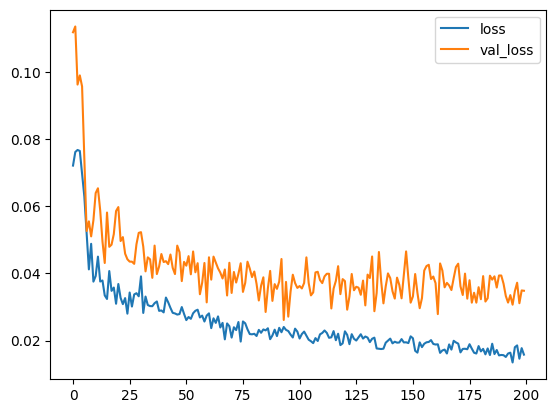

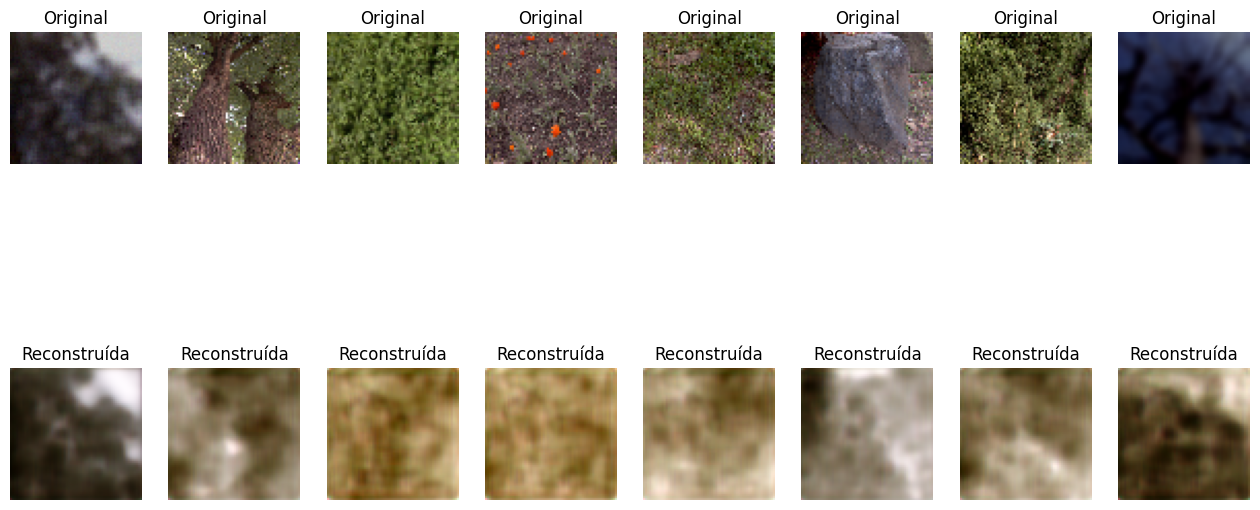

In [4]:
Modelo.Dataset(treino, validacao, teste)
Modelo.compilar_modelo()
Modelo.treinar_autoencoder(epocas=200, salvar=True, nome_da_base='Kyoto' ,batch_size=8)